# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

Análise das Variáveis Qualitativas em relação à Renda (Log)

Análise: Posse de Imóvel vs. Renda

Estatísticas da Renda (Log) por Posse de Imóvel:
   posse_de_imovel  count      mean    median       std
0            False   4918  8.059330  8.050410  0.804646
1             True  10082  8.136275  8.114085  0.792735




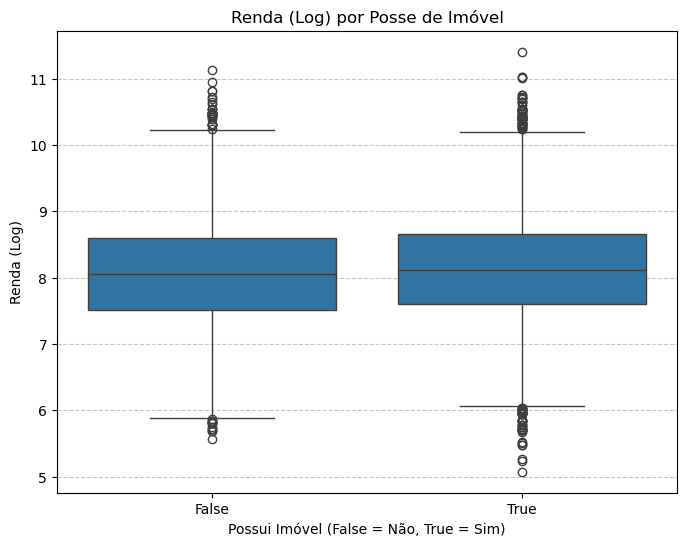

Análise: Posse de Veículo vs. Renda

Estatísticas da Renda (Log) por Posse de Veículo:
   posse_de_veiculo  count      mean    median       std
0             False   9167  8.053462  8.034012  0.800664
1              True   5833  8.201547  8.178759  0.783941




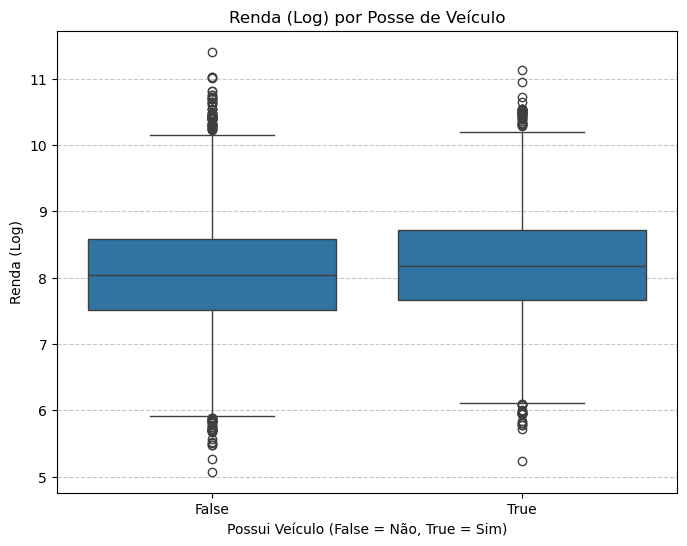

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset
df = pd.read_csv('previsao_de_renda.csv')

# Pré-processamento: Remover colunas de índice e tratar NaNs na renda
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
if 'index' in df.columns:
    df = df.drop(columns=['index'])

df_analise = df.dropna(subset=['renda']).copy()

# Criar a variável renda_log
min_renda = df_analise['renda'].min()
if min_renda <= 0:
    df_analise['renda_log'] = np.log1p(df_analise['renda'])
else:
    df_analise['renda_log'] = np.log(df_analise['renda'])

print("Análise das Variáveis Qualitativas em relação à Renda (Log)\n")

# --- Análise de Posse de Imóvel vs. Renda ---
print("Análise: Posse de Imóvel vs. Renda\n")

# Estatísticas descritivas
estat_imovel = df_analise.groupby('posse_de_imovel')['renda_log'].agg(['count', 'mean', 'median', 'std']).reset_index()
print("Estatísticas da Renda (Log) por Posse de Imóvel:")
print(estat_imovel)
print("\n" + "="*50 + "\n")

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='posse_de_imovel', y='renda_log', data=df_analise)
plt.title('Renda (Log) por Posse de Imóvel')
plt.xlabel('Possui Imóvel (False = Não, True = Sim)')
plt.ylabel('Renda (Log)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Análise de Posse de Veículo vs. Renda ---
print("Análise: Posse de Veículo vs. Renda\n")

# Estatísticas descritivas
estat_veiculo = df_analise.groupby('posse_de_veiculo')['renda_log'].agg(['count', 'mean', 'median', 'std']).reset_index()
print("Estatísticas da Renda (Log) por Posse de Veículo:")
print(estat_veiculo)
print("\n" + "="*50 + "\n")

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='posse_de_veiculo', y='renda_log', data=df_analise)
plt.title('Renda (Log) por Posse de Veículo')
plt.xlabel('Possui Veículo (False = Não, True = Sim)')
plt.ylabel('Renda (Log)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
#Há uma diferença marginal na renda média e mediana entre quem possui imóvel e quem não possui. Embora quem tem imóvel tenha uma renda logarítmica ligeiramente maior, a diferença é pequena (cerca de 0.08 na média logarítmica). Visualmente, as distribuições são muito parecidas. Isso sugere que a posse_de_imovel sozinha não é uma preditora muito forte de renda. A informação de possuir um imóvel adiciona pouco poder discriminatório para prever a renda, dado que as faixas de renda se sobrepõem amplamente entre os dois grupos.

#Existe uma diferença mais perceptível na renda média e mediana entre quem possui veículo e quem não possui. A renda logarítmica de quem possui veículo é consistentemente maior (cerca de 0.15 na média logarítmica). Esta diferença é mais pronunciada do que a observada para a posse de imóvel. Isso indica que a posse_de_veiculo pode ser uma preditora razoável de renda, pois há uma tendência de que pessoas com veículo tenham uma renda mais elevada.

In [11]:
import pandas as pd
import numpy as np
from scipy import stats # Para o teste t

# Assumindo que 'df_analise' já está carregado e com 'renda_log' criada
# (Recarregando e pré-processando para garantir a execução independente)
df = pd.read_csv('previsao_de_renda.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
if 'index' in df.columns:
    df = df.drop(columns=['index'])
df_analise = df.dropna(subset=['renda']).copy()
min_renda = df_analise['renda'].min()
if min_renda <= 0:
    df_analise['renda_log'] = np.log1p(df_analise['renda'])
else:
    df_analise['renda_log'] = np.log(df_analise['renda'])

print("--- Análise de Significância Estatística ---")

# --- Teste para Posse de Imóvel vs. Renda (Log) ---
print("\nTestando Posse de Imóvel vs. Renda (Log):")
# Separar a renda logarítmica para quem possui e quem não possui imóvel
grupo_imovel_true = df_analise[df_analise['posse_de_imovel'] == True]['renda_log']
grupo_imovel_false = df_analise[df_analise['posse_de_imovel'] == False]['renda_log']

# Realizar o teste t de Student. equal_var=False é mais robusto (não assume variâncias iguais).
t_stat_imovel, p_value_imovel = stats.ttest_ind(grupo_imovel_true, grupo_imovel_false, equal_var=False)

print(f"Média da renda (Log) para 'Possui Imóvel': {grupo_imovel_true.mean():.3f}")
print(f"Média da renda (Log) para 'Não Possui Imóvel': {grupo_imovel_false.mean():.3f}")
print(f"Estatística T: {t_stat_imovel:.3f}")
print(f"Valor p: {p_value_imovel:.4f}")

# Critério de significância (alfa)
alpha = 0.05
if p_value_imovel < alpha:
    print(f"Com p-valor de {p_value_imovel:.4f} (menor que {alpha}), rejeitamos a hipótese nula.")
    print("Há uma diferença estatisticamente significante na renda média (log) entre quem possui e quem não possui imóvel.")
else:
    print(f"Com p-valor de {p_value_imovel:.4f} (maior que {alpha}), não rejeitamos a hipótese nula.")
    print("Não há uma diferença estatisticamente significante na renda média (log) entre quem possui e quem não possui imóvel.")


# --- Teste para Posse de Veículo vs. Renda (Log) ---
print("\nTestando Posse de Veículo vs. Renda (Log):")
# Separar a renda logarítmica para quem possui e quem não possui veículo
grupo_veiculo_true = df_analise[df_analise['posse_de_veiculo'] == True]['renda_log']
grupo_veiculo_false = df_analise[df_analise['posse_de_veiculo'] == False]['renda_log']

# Realizar o teste t de Student
t_stat_veiculo, p_value_veiculo = stats.ttest_ind(grupo_veiculo_true, grupo_veiculo_false, equal_var=False)

print(f"Média da renda (Log) para 'Possui Veículo': {grupo_veiculo_true.mean():.3f}")
print(f"Média da renda (Log) para 'Não Possui Veículo': {grupo_veiculo_false.mean():.3f}")
print(f"Estatística T: {t_stat_veiculo:.3f}")
print(f"Valor p: {p_value_veiculo:.4f}")

# Critério de significância (alfa)
if p_value_veiculo < alpha:
    print(f"Com p-valor de {p_value_veiculo:.4f} (menor que {alpha}), rejeitamos a hipótese nula.")
    print("Há uma diferença estatisticamente significante na renda média (log) entre quem possui e quem não possui veículo.")
else:
    print(f"Com p-valor de {p_value_veiculo:.4f} (maior que {alpha}), não rejeitamos a hipótese nula.")
    print("Não há uma diferença estatisticamente significante na renda média (log) entre quem possui e quem não possui veículo.")

--- Análise de Significância Estatística ---

Testando Posse de Imóvel vs. Renda (Log):
Média da renda (Log) para 'Possui Imóvel': 8.136
Média da renda (Log) para 'Não Possui Imóvel': 8.059
Estatística T: 5.525
Valor p: 0.0000
Com p-valor de 0.0000 (menor que 0.05), rejeitamos a hipótese nula.
Há uma diferença estatisticamente significante na renda média (log) entre quem possui e quem não possui imóvel.

Testando Posse de Veículo vs. Renda (Log):
Média da renda (Log) para 'Possui Veículo': 8.202
Média da renda (Log) para 'Não Possui Veículo': 8.053
Estatística T: 11.185
Valor p: 0.0000
Com p-valor de 0.0000 (menor que 0.05), rejeitamos a hipótese nula.
Há uma diferença estatisticamente significante na renda média (log) entre quem possui e quem não possui veículo.


In [13]:
# Ambas as variáveis qualitativas, posse_de_imovel e posse_de_veiculo, discriminam a renda de forma estatisticamente significante.

# Para posse_de_imovel, embora a diferença na média de renda (log) seja menor do que para posse de veículo, ela é estatisticamente significativa. Isso significa que a posse de imóvel está associada a uma renda média (log) diferente, e essa diferença não é por acaso.

# Para posse_de_veiculo, a diferença na média de renda (log) entre os grupos é mais pronunciada e também é altamente estatisticamente significante.

# Isso sugere que, para o modelo preditivo, ambas as variáveis podem ser consideradas como influenciadores da renda, sendo posse_de_veiculo provavelmente com um impacto um pouco mais "forte" (maior diferença na média), mas ambas com uma associação estatisticamente comprovada.